# Darya Amirbeigi 

## How has life expectancy, economy, and social support contributed to the average global happiness index from 2015-2021?

  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

df1 = pd.read_csv('../data/raw/world_happiness_report.csv')

print(df1)

      Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   
1224        

In [ ]:
d1 = df1.shape
d2 = df1.head()
d3 = df1.columns
print(d1)
print(d2)
print(d3)

(1229, 12)
   Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Gene

In [ ]:
df1 = df1.transform(pd.to_numeric, errors='coerce')

'''To change my variables in the dataset into numeric for the future visualization'''

'To change my variables in the dataset into numeric for the future visualization'

In [ ]:
df1 = df1[df1.Year != 2022]


'''To delete the data from year 2022'''
df1

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,NaN,NaN,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,NaN,NaN,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,NaN,NaN,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,NaN,NaN,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,NaN,NaN,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1078,144,145,NaN,NaN,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300,2021
1079,145,146,NaN,NaN,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700,2021
1080,146,147,NaN,NaN,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700,2021
1081,147,148,NaN,NaN,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700,2021


In [ ]:

df1 = df1.drop(['Happiness Rank', 'Country', 'Region', 'Freedom', 'Trust (Government Corruption)', 'Generosity'], axis=1)
'''dropping the columns that I don't need for my analysis'''

"dropping the columns that I don't need for my analysis"

In [ ]:
df1= df1.drop(df1.columns[0], axis=1)
print(df1.shape)


''' dropping unnsmed column'''
df1


(1083, 5)


,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Year
0,7.587,1.39651,1.34951,0.94143,2015
1,7.561,1.30232,1.40223,0.94784,2015
2,7.527,1.32548,1.36058,0.87464,2015
3,7.522,1.45900,1.33095,0.88521,2015
4,7.427,1.32629,1.32261,0.90563,2015
...,...,...,...,...,...
1078,3.512,0.45100,0.73100,0.00700,2021
1079,3.467,1.09900,0.72400,0.34000,2021
1080,3.415,0.36400,0.20200,0.40700,2021
1081,3.145,0.45700,0.64900,0.24300,2021


In [ ]:
df1.to_csv('../data/processed/world_happiness_report_processed_Notebook3.csv')
'''to save cleaned dataset into processed folder'''

'to save cleaned dataset into processed folder'

In [ ]:
#hue = df1[['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)']].apply(
    #lambda row: f"{row.Economy (GDP per Capita)}, {row.Family (Social Support)}, {row.Health (Life Expectancy)}", axis=1)
#hue.name = 'Economy (GDP per Capita), Family (Social Support), Health (Life Expectancy)'
#sns.relplot(x='Year', y='Happiness Score', hue= df1[['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)']].apply(tuple, axis =1), data=df1)

#sns.displot(data=df1, x="Year", y= "Happiness Score", hue= df1['Economy (GDP per Capita)'], height=7, aspect=2) 

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

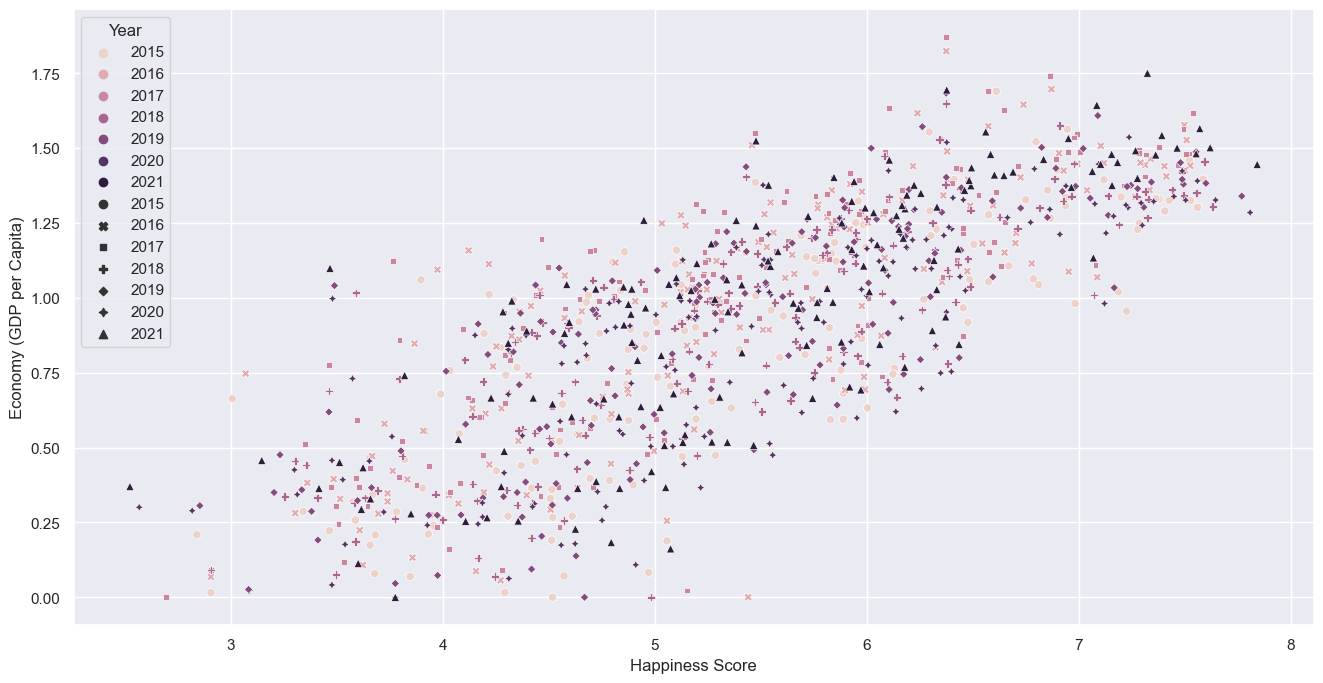

In [ ]:
sns.scatterplot(x='Happiness Score', hue = 'Year', data = df1, y='Economy (GDP per Capita)', style = 'Year', sizes = (800,5000))

In [ ]:

#sns.histplot(data=df1, x="Year", y="Happiness Score", discrete=True)

In [ ]:
#sns.histplot(data=df1, x="Economy (GDP per Capita)", y= "Happiness Score", kde=True)

<seaborn.axisgrid.FacetGrid>

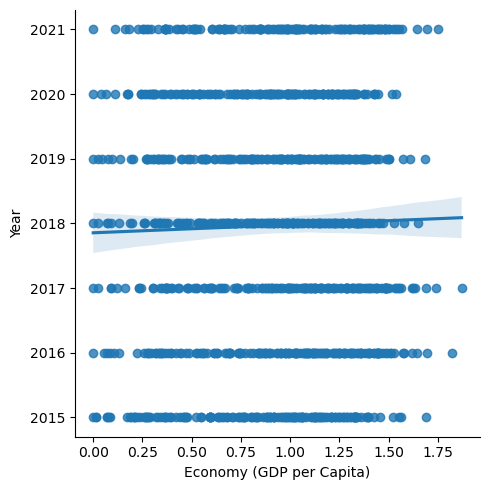

In [ ]:
sns.lmplot(data=df1,x="Economy (GDP per Capita)", y="Year")

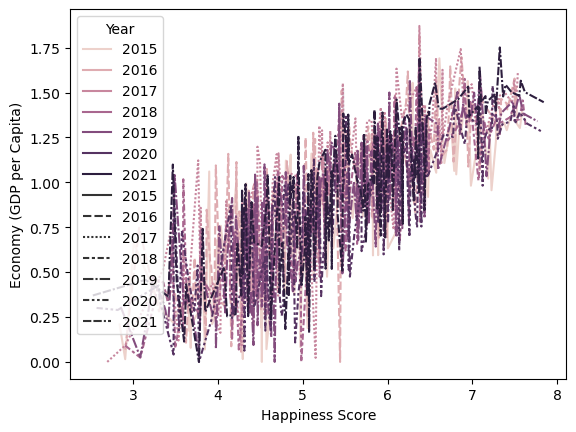

In [ ]:
ax = sns.lineplot(x = 'Happiness Score', y= 'Economy (GDP per Capita)', hue = "Year", style= "Year", data = df1)

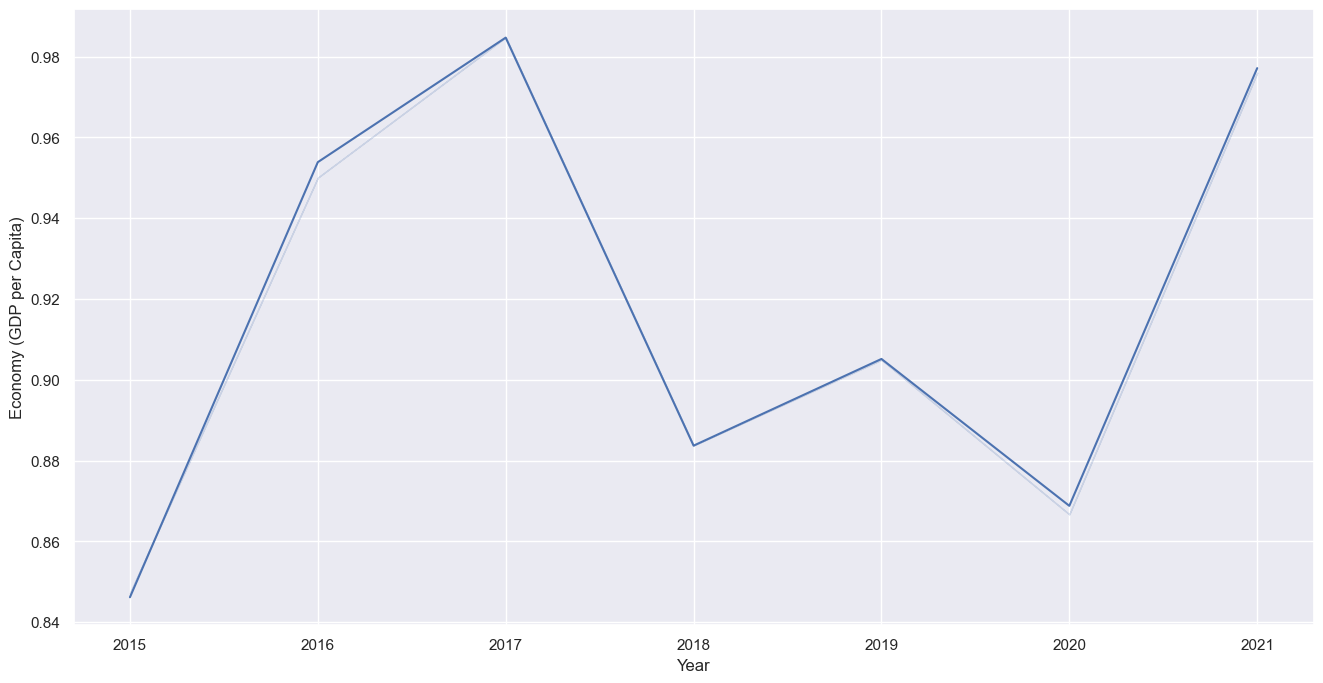

In [ ]:
ax = sns.lineplot(x = 'Year', y= 'Economy (GDP per Capita)',markers=True,errorbar=('ci', False), data = df1)

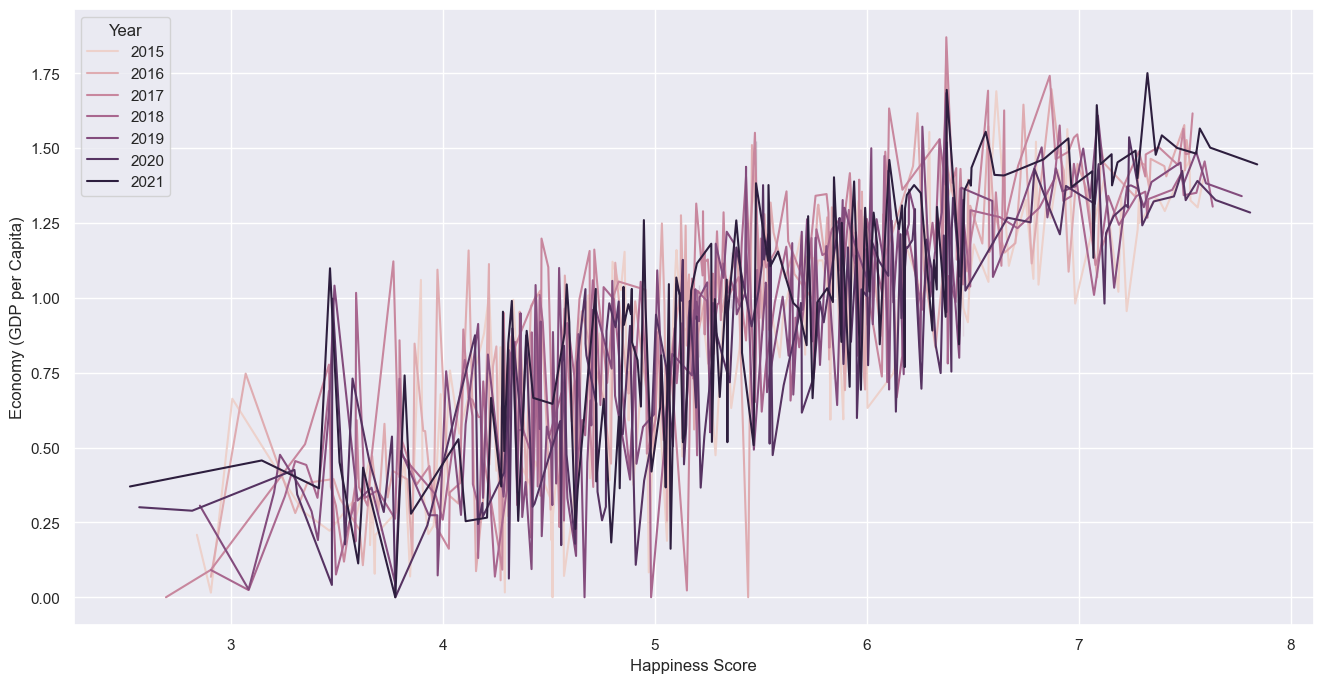

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.lineplot(x = 'Happiness Score', y= 'Economy (GDP per Capita)', hue = "Year",  data = df1)

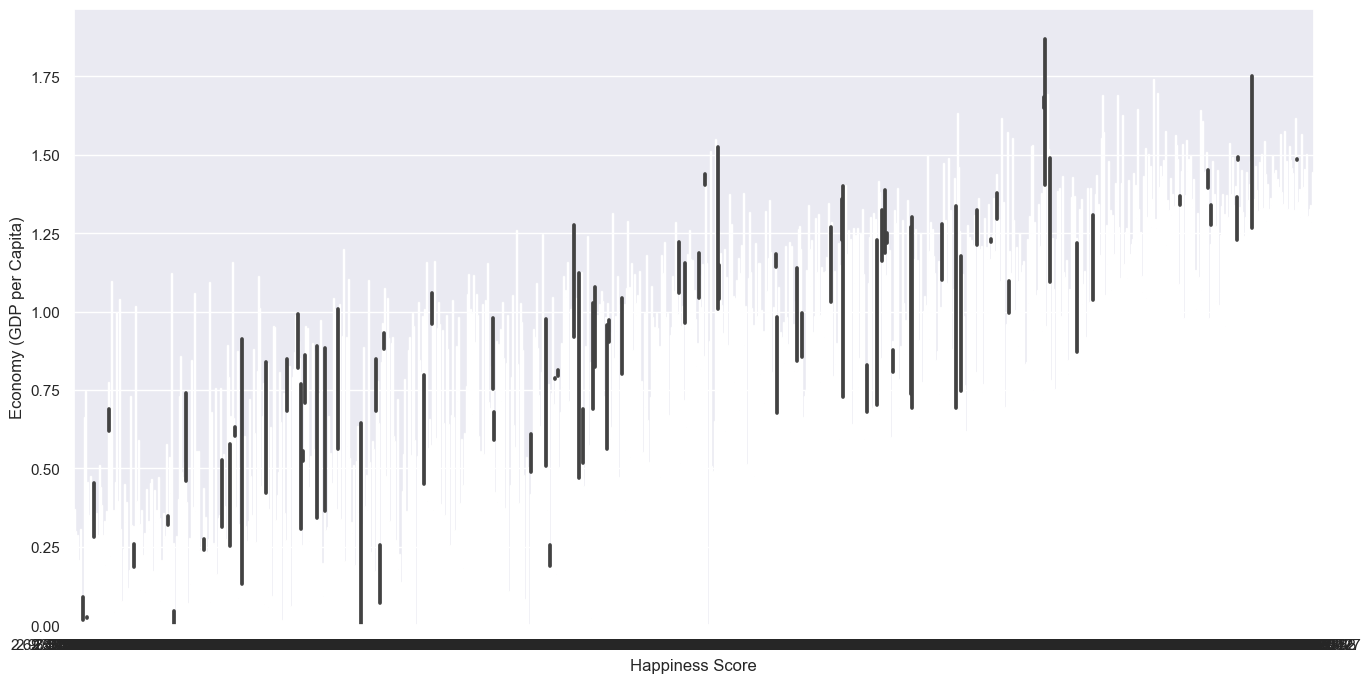

In [ ]:
ax = sns.barplot(x = 'Happiness Score', y= 'Economy (GDP per Capita)',  data = df1)

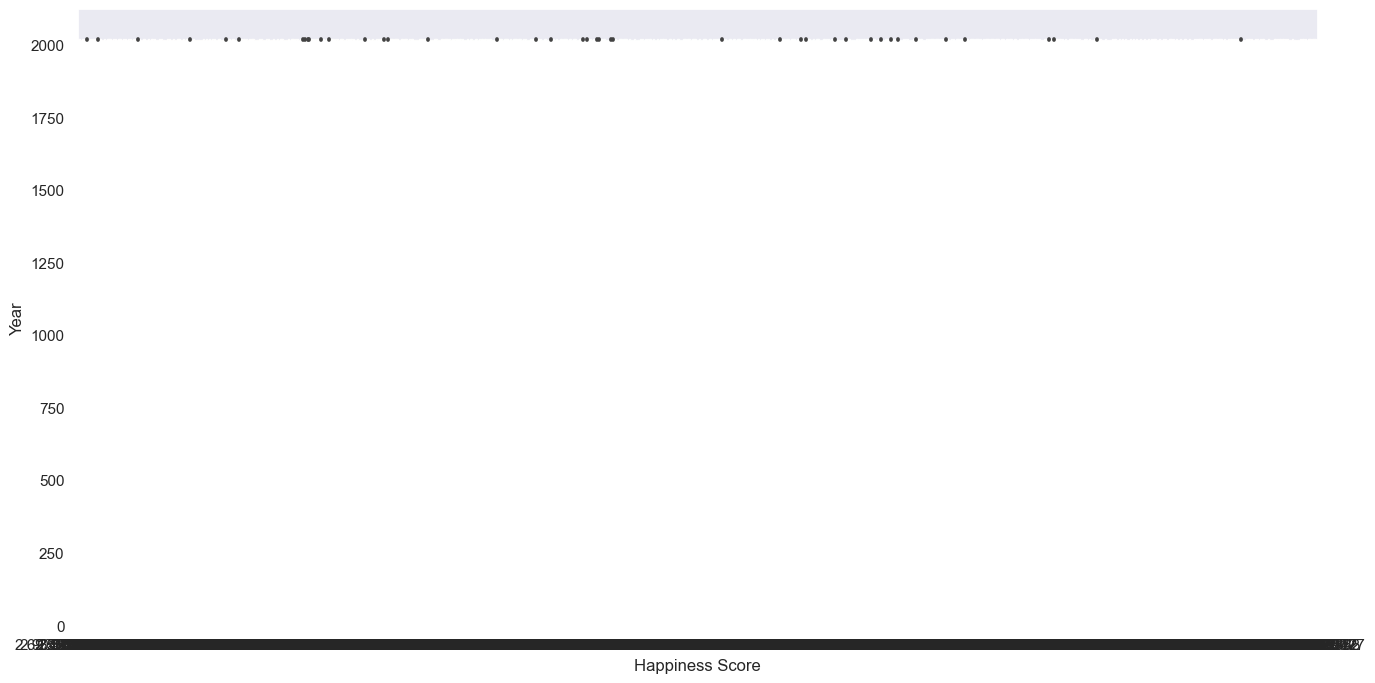

In [ ]:
ax = sns.barplot(x = 'Happiness Score', y= 'Year',  data = df1)

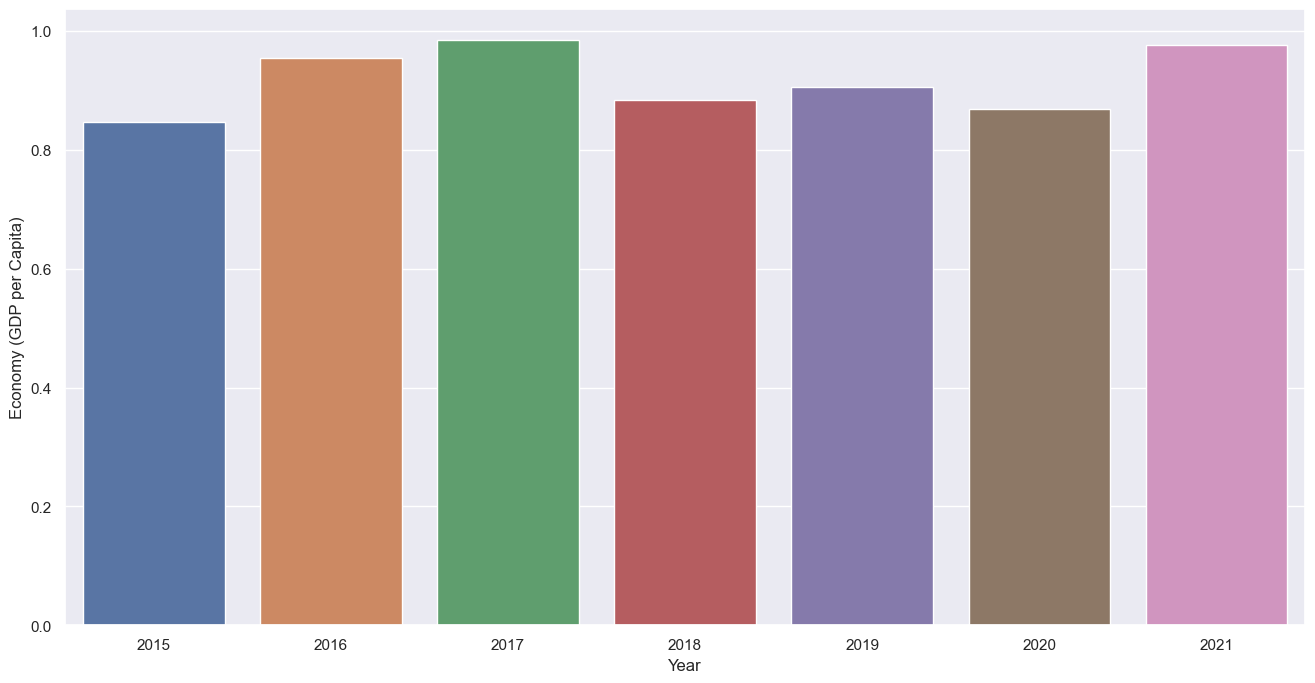

In [ ]:
ax = sns.barplot(x = 'Year', y= 'Economy (GDP per Capita)', errorbar=('ci', False),  data = df1)


<seaborn.axisgrid.FacetGrid>

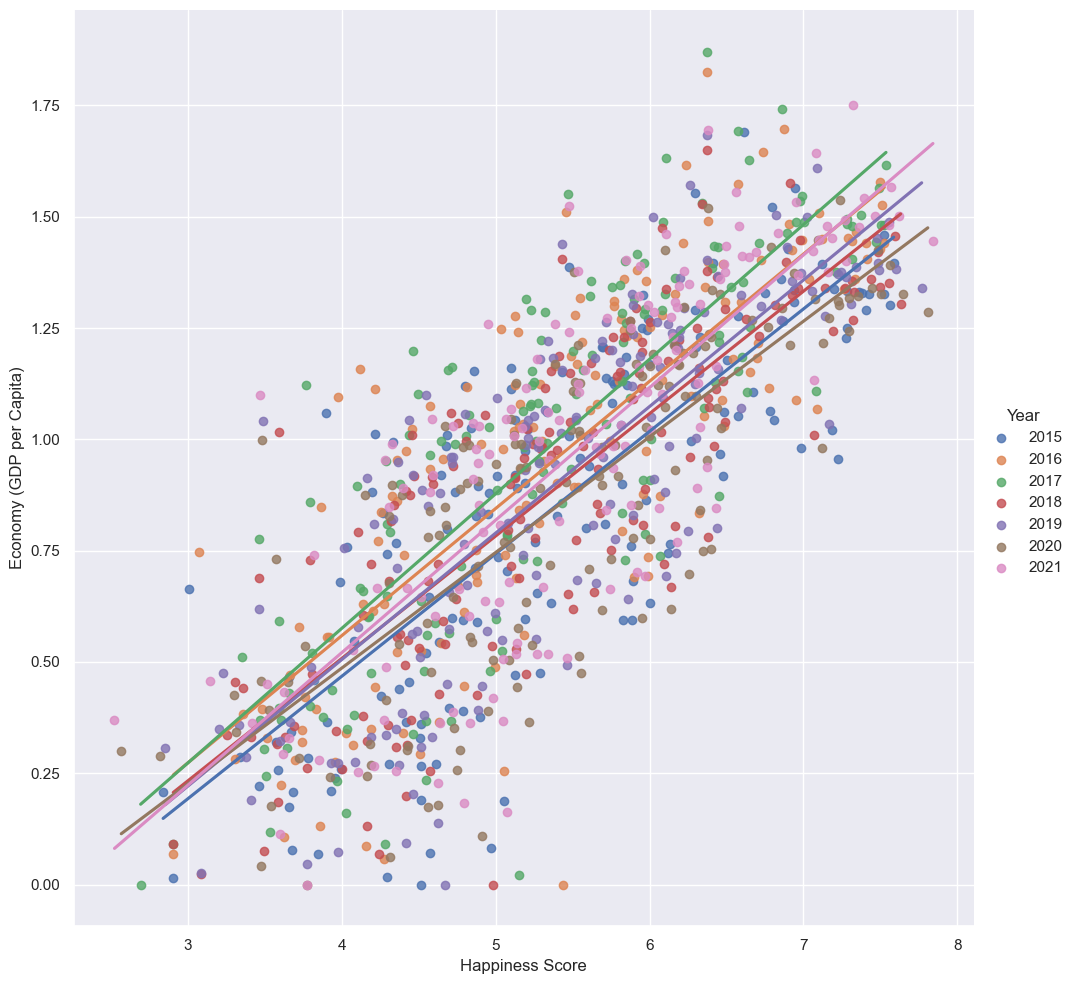

In [ ]:
sns.lmplot(x='Happiness Score', data = df1, hue= 'Year', ci= False, y='Economy (GDP per Capita)', height =10)

<seaborn.axisgrid.FacetGrid>

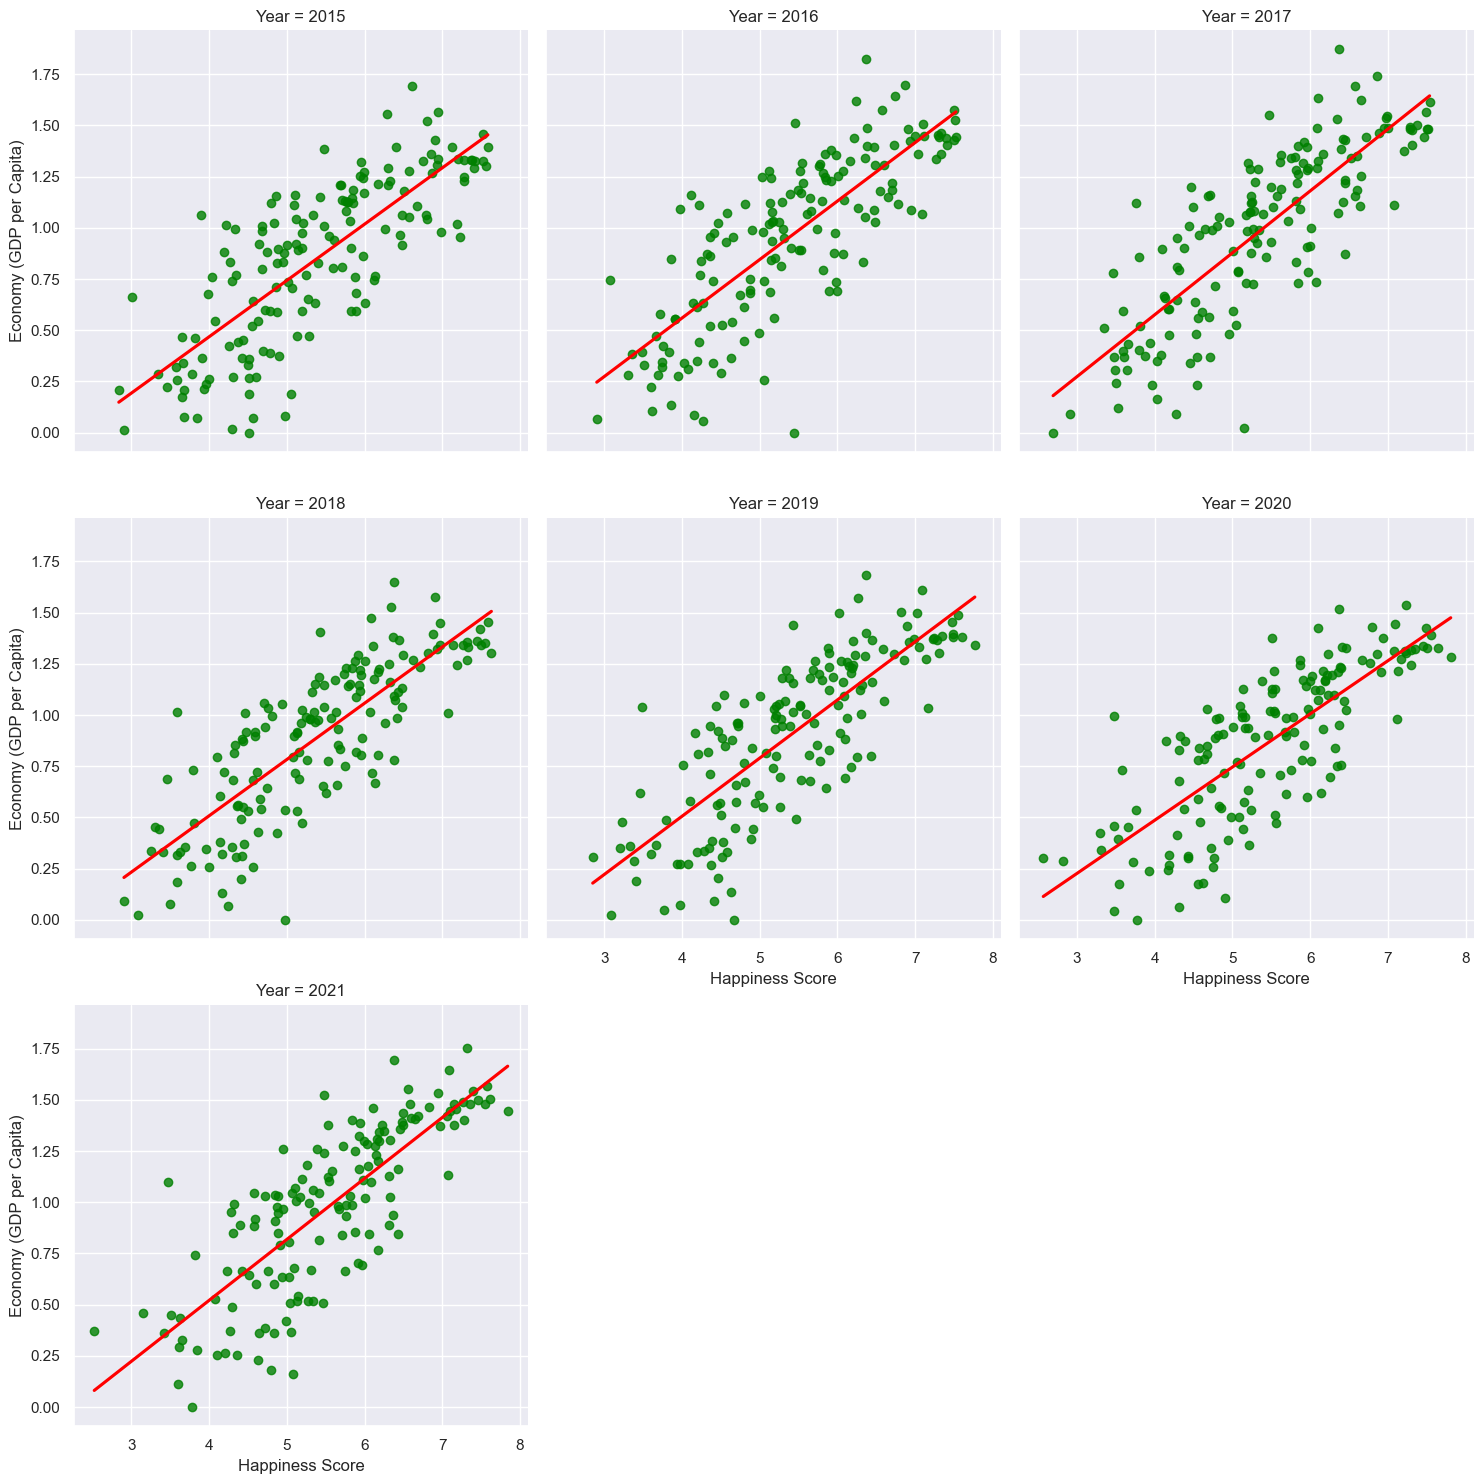

In [ ]:
sns.lmplot(x='Happiness Score', data = df1, col= 'Year', ci= False, scatter_kws = {'color':'green'}, col_wrap = 3,line_kws = {'color': 'red'}, y='Economy (GDP per Capita)', height =5)